In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('gnewt_morning_10feb.csv', delimiter=';')
df.head().T

,0,1,2,3,4
altitude,0,0,0,0,0
co_a,267.5,267.5,265.9,265.9,270.8
co_w,191.8,190.2,192.6,191.8,191
pt,0,0,0,0,0
gps_fix,0,0,0,0,0
heading,0,0,0,0,0
humidity,14.1,14.1,14.1,14.1,14.1
latitude,0,0,0,0,0
lonet_bat,0,0,0,0,0
longitude,0,0,0,0,0


# NO2

In [3]:
df.no2_a.describe()

count    2091.000000
mean      351.352415
std       288.682616
min       100.000000
25%       286.100000
50%       305.400000
75%       328.000000
max      3300.000000
Name: no2_a, dtype: float64

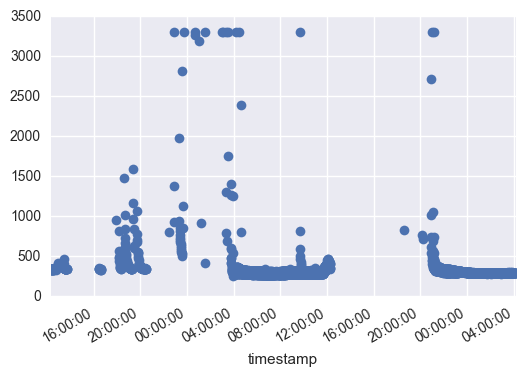

In [4]:
df.timestamp = pd.to_datetime(df.timestamp)
df = df.sort_values(by='timestamp')
# there is one on 2 jan, whereas the rest is on 8 feb
df.tail(-1).set_index('timestamp').no2_a.plot(style='o')

## One hour averages

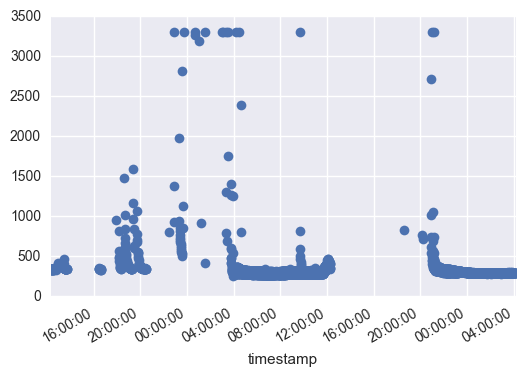

In [5]:
df = df.tail(-1)
ds = xr.Dataset.from_dataframe(df.set_index('timestamp', 'id'))
ds_mean_1h = ds.resample(freq='1H', dim='timestamp', how='mean', skipna=True)
df.set_index('timestamp').no2_a.plot(linestyle='none', marker='o')

In [6]:
df.id.unique()

array([11, 29, 24, 25, 26], dtype=int64)

In [7]:
stationary_df = ds.to_dataframe()
# alphasense no2 readings
describe_a_df = pd.DataFrame()
for car_id in df.id.unique():
    describe_a_df[car_id] = stationary_df[stationary_df['id'] == car_id].no2_a.describe()
describe_a_df

,11,29,24,25,26
count,1343.000000,18.000000,397.000000,202.000000,130.000000
mean,364.647878,293.788889,317.170529,343.196040,340.963846
std,330.838987,4.719532,161.362866,217.104289,227.062301
min,255.500000,286.100000,281.200000,286.100000,282.900000
25%,277.200000,289.500000,288.500000,299.800000,292.700000
50%,307.800000,293.700000,292.500000,321.100000,298.600000
75%,332.000000,298.400000,310.300000,336.800000,312.700000
max,3300.000000,299.800000,3300.000000,3300.000000,2719.000000


In [8]:
# mics no2 readings
describe_m_df = pd.DataFrame()
for car_id in df.id.unique():
    describe_m_df[car_id] = stationary_df[stationary_df['id'] == car_id].m_no2.describe()
describe_m_df

,11,29,24,25,26
count,142.000000,0.0,397.000000,202.000000,130.000000
mean,225.011103,NaN,571.399994,507.548711,693.412266
std,226.622593,NaN,79.343490,95.677028,153.343382
min,0.000000,NaN,478.681340,413.406620,567.326050
25%,0.000000,NaN,510.109890,453.901118,595.128220
50%,194.615400,NaN,567.326050,491.978040,640.659420
75%,448.864500,NaN,608.424930,536.300385,731.721667
max,530.256410,NaN,1396.556880,1317.582520,1477.142940


In [9]:
# winsen no2 readings
describe_w_df = pd.DataFrame()
for car_id in df.id.unique():
    describe_w_df[car_id] = stationary_df[stationary_df['id'] == car_id].no2_w.describe()
describe_w_df

,11,29,24,25,26
count,1343.000000,18.000000,397.000000,202.000000,130.000000
mean,335.318838,275.200000,264.294962,267.644059,2383.671538
std,386.304209,3.107486,3.065295,2.889884,4.708153
min,41.900000,272.400000,257.900000,259.500000,2376.500000
25%,259.500000,272.400000,261.900000,265.900000,2378.900000
50%,262.700000,274.800000,264.300000,267.500000,2383.700000
75%,266.700000,278.600000,266.700000,270.000000,2387.000000
max,2445.000000,280.400000,270.000000,272.400000,2413.600000


There seems to be a spike for Winsen data for vehicle 26: it's unusually high, maybe another bug? Also, from the max values, the spikes are only in vehicle 11 and 26, especially in vehicle 26. It doesn't seem to be a problem with the vehicle, since alphasense doesn't seem to show a consistently high value for vehicle 26. Maybe we can filter the spikes out... 

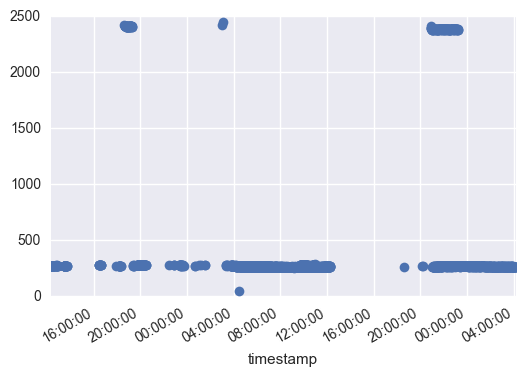

In [10]:
stationary_df.no2_w.plot(style='o')

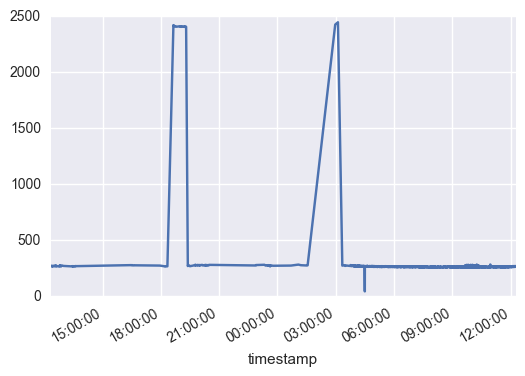

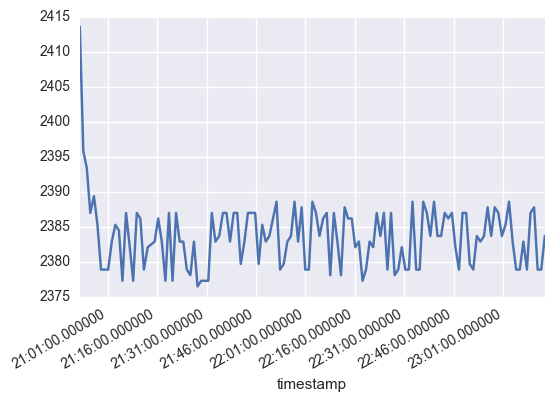

In [11]:
# winsen no2 plot for 11 and 26
stationary_df[stationary_df.id == 11].no2_w.plot()
plt.figure()
stationary_df[stationary_df.id == 26].no2_w.plot()